Mean Squared Error: 2720.795938379988
Next 30 days predicted stock prices:
            Predicted_Close
2024-06-22      1087.156443
2024-06-23      1088.126378
2024-06-24      1089.093374
2024-06-25      1090.057431
2024-06-26      1091.018549
2024-06-27      1091.976728
2024-06-28      1092.931969
2024-06-29      1093.884270
2024-06-30      1094.833632
2024-07-01      1095.780055
2024-07-02      1096.723539
2024-07-03      1097.664085
2024-07-04      1098.601691
2024-07-05      1099.536358
2024-07-06      1100.468086
2024-07-07      1101.396876
2024-07-08      1102.322726
2024-07-09      1103.245637
2024-07-10      1104.165609
2024-07-11      1105.082643
2024-07-12      1105.996737
2024-07-13      1106.907892
2024-07-14      1107.816109
2024-07-15      1108.721386
2024-07-16      1109.623725
2024-07-17      1110.523124
2024-07-18      1111.419584
2024-07-19      1112.313106
2024-07-20      1113.203688
2024-07-21      1114.091332


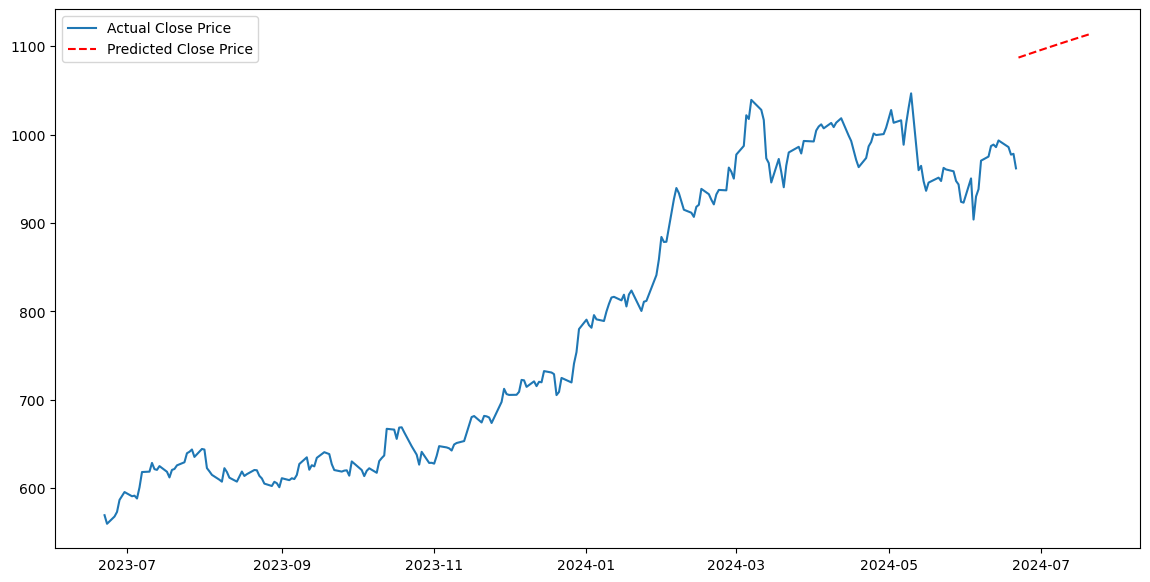

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data from CSV
def load_data(csv_file):
    stock_data = pd.read_csv(csv_file)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)
    stock_data = stock_data[['Close']]
    stock_data = stock_data.dropna()
    return stock_data

# Prepare the dataset
def prepare_data(stock_data, degree=2):
    stock_data['Target'] = stock_data['Close'].shift(-30)
    stock_data = stock_data.dropna()
    X = np.array(stock_data.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)
    y = np.array(stock_data['Target'])
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return X_poly, y, poly

# Train and evaluate the model
def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')
    return model

# Make future predictions
def make_predictions(stock_data, model, poly, days=30):
    last_date = stock_data.index[-1]
    future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, days + 1)]
    future_dates_ordinals = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
    future_dates_poly = poly.transform(future_dates_ordinals)
    future_predictions = model.predict(future_dates_poly)
    future_data = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])
    return future_data

# Plot the results
def plot_results(stock_data, future_data):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='Actual Close Price')
    plt.plot(future_data.index, future_data['Predicted_Close'], color='red', linestyle='--', label='Predicted Close Price')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    csv_file = "TATAMOTORS.csv"  # Replace with your CSV file path
    stock_data = load_data(csv_file)
    X_poly, y, poly = prepare_data(stock_data, degree=2)
    
    model = train_and_evaluate_model(X_poly, y)
    future_data = make_predictions(stock_data, model, poly, days=30)
    
    # Print future predictions
    print("Next 30 days predicted stock prices:")
    print(future_data)
    
    plot_results(stock_data, future_data)
